In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import os
%matplotlib inline

In [1]:
main_folder = "C:/Users/Kieran/Documents/Master Thesis Data"

In [27]:
for file in os.listdir(main_folder+'/filtered'):
    mouse=file.split("_")[1]+"."+file.split("_")[2][0:-3]
    path_original=f"C:/Users/Kieran/Documents/Master Thesis Data/Datasets/Original"
    if not os.path.exists(path_original):
        os.makedirs(path_original)
    file=os.path.join(main_folder+'/filtered/', file)
    
    df = pd.read_csv(file,header=[1,2])
    df.columns = ['frame_number'] + list(df.columns[1:])
    df['mouse_no'] = float(mouse)
    df.to_csv(f'{path_original}/{mouse}_Original_data.csv', index=False)
    
    
    mc_df = df.copy()
    mc_df = mc_df.iloc[:, 1:-1]
    mc_df = mc_df.astype(float)
    
    s1_x = mc_df.iloc[:,39].copy()
    s1_y = mc_df.iloc[:,40].copy()

    for column_index in range(0, len(mc_df.columns), 3):
        x_column = mc_df.columns[column_index]
        y_column = mc_df.columns[column_index+1]

        x = mc_df[x_column]
        y = mc_df[y_column]

        transformed_x = x - s1_x
        transformed_y = y - s1_y

        mc_df[x_column] = transformed_x
        mc_df[y_column] = transformed_y
        
    mc_df.iloc[:,39]=s1_x
    mc_df.iloc[:,40]=s1_y
    mc_df.insert(0, 'frame_number', df['frame_number'])
    mc_df['mouse_no'] = float(mouse)
    path_mc="C:/Users/Kieran/Documents/Master Thesis Data/Datasets/MouseCentric"
    if not os.path.exists(path_mc):
        os.makedirs(path_mc)
    mc_df.to_csv(f'{path_mc}/{mouse}_MouseCentric_data.csv', index=False)
    
mc_df

,frame_number,"(nose, x)","(nose, y)","(nose, likelihood)","(H1R, x)","(H1R, y)","(H1R, likelihood)","(H2R, x)","(H2R, y)","(H2R, likelihood)",...,"(tail, x)","(tail, y)","(tail, likelihood)","(S2, x)","(S2, y)","(S2, likelihood)","(S1, x)","(S1, y)","(S1, likelihood)",mouse_no
0,0,30.384460,100.418274,0.998016,14.997864,90.236603,0.999832,3.026123,79.738708,0.999787,...,-74.122620,-138.429169,0.998126,-40.596069,-65.701355,0.959148,634.624084,393.225037,0.980551,88.3
1,1,29.404907,100.418274,0.997478,14.060913,90.236603,0.999858,1.906921,79.753998,0.999547,...,-67.942810,-138.429169,0.990634,-37.891235,-65.515106,0.994436,635.755554,393.225037,0.990613,88.3
2,2,31.092712,100.263489,0.997546,16.141724,90.215149,0.999862,3.887573,79.885681,0.999554,...,-67.808960,-138.268265,0.993706,-37.983154,-65.097687,0.993078,635.853516,393.380676,0.992392,88.3
3,3,28.939636,100.263489,0.998445,15.096619,90.215149,0.999822,3.714050,79.885681,0.999863,...,-66.087769,-138.138580,0.990188,-37.749817,-64.800659,0.988968,636.220825,393.380676,0.986333,88.3
4,4,27.425293,94.095795,0.998202,13.582275,85.341614,0.999838,2.199707,73.449341,0.999926,...,-62.431213,-145.477432,0.989022,-35.856934,-69.147339,0.981768,637.735168,400.914368,0.992424,88.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,92.895691,-22.675415,0.999232,85.470825,-11.074768,0.999924,75.502136,-8.060303,0.999492,...,-24.412476,116.388947,0.999563,-33.810913,56.276733,0.998793,525.421082,367.743622,0.998882,88.3
11246,11246,94.005859,-17.802216,0.999680,87.183533,-7.193573,0.999842,75.731262,-6.426147,0.999562,...,-24.296509,116.438507,0.999529,-33.658234,56.326294,0.998716,525.653503,367.694061,0.998840,88.3
11247,11247,106.110474,-17.802216,0.999622,96.254883,-7.193573,0.999950,82.021301,-3.780365,0.999656,...,-24.760468,115.177551,0.999215,-33.469727,56.024719,0.999035,525.961548,367.694061,0.998980,88.3
11248,11248,106.110474,-17.802216,0.999570,96.254883,-7.193573,0.999939,82.021301,-3.780365,0.999616,...,-24.760468,114.962799,0.999225,-33.469727,55.950989,0.998865,525.961548,367.694061,0.998603,88.3


In [3]:
df = pd.read_csv(main_folder + '/Datasets/Original/2.4_Original_data.csv')
df

,frame_number,"('nose', 'x')","('nose', 'y')","('nose', 'likelihood')","('H1R', 'x')","('H1R', 'y')","('H1R', 'likelihood')","('H2R', 'x')","('H2R', 'y')","('H2R', 'likelihood')",...,"('tail', 'x')","('tail', 'y')","('tail', 'likelihood')","('S2', 'x')","('S2', 'y')","('S2', 'likelihood')","('S1', 'x')","('S1', 'y')","('S1', 'likelihood')",mouse_no
0,0,655.465454,596.169556,0.375685,1.441294,569.380432,0.672269,1.100614,536.281982,0.150927,...,653.435913,374.538391,0.926555,648.882812,442.020569,0.960436,673.570740,463.700592,0.986622,2.4
1,1,655.465454,598.723022,0.137304,653.664246,573.473999,0.127421,630.188904,546.845093,0.087558,...,656.039673,381.053955,0.720367,652.826843,442.020569,0.975218,675.550964,463.700592,0.988386,2.4
2,2,655.465454,598.850098,0.141754,653.664246,573.473999,0.189718,655.954224,546.845093,0.132388,...,656.039673,410.980377,0.730994,653.333252,442.020569,0.988719,675.550964,463.700592,0.991137,2.4
3,3,655.034790,599.351257,0.328517,1.797714,569.380432,0.105963,655.954224,536.281982,0.118531,...,656.039673,410.980377,0.651599,653.333252,433.984344,0.964876,675.550964,459.856781,0.996633,2.4
4,4,655.034790,598.850098,0.093978,653.664246,569.278564,0.098178,655.954224,515.741516,0.097626,...,649.143372,410.980377,0.694267,652.826843,433.482178,0.947889,674.733032,454.161774,0.993485,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,172.412689,492.601685,0.980347,161.639145,491.723602,0.962631,158.205261,483.657898,0.995811,...,106.437271,344.952820,0.175626,188.598572,399.736053,0.837555,148.013779,398.291473,0.784131,2.4
11246,11246,158.804474,496.747742,0.966895,151.414688,493.952057,0.901850,147.500107,488.071167,0.989264,...,152.058899,344.952820,0.511682,188.598572,400.137146,0.830551,148.013779,398.291473,0.955154,2.4
11247,11247,158.229584,499.269562,0.884514,146.388336,495.241730,0.989397,146.350800,487.560333,0.999033,...,163.117462,364.305450,0.365775,188.401077,399.936371,0.862037,149.812454,404.461731,0.975054,2.4
11248,11248,158.204834,499.269562,0.810430,145.989441,495.241730,0.979529,144.811569,487.560333,0.997931,...,163.117462,364.305450,0.596857,188.401077,399.936371,0.761463,149.812454,404.461731,0.990626,2.4


In [4]:
mc_df = pd.read_csv(main_folder + '/Datasets/MouseCentric/2.4_MouseCentric_data.csv')
mc_df

,frame_number,"('nose', 'x')","('nose', 'y')","('nose', 'likelihood')","('H1R', 'x')","('H1R', 'y')","('H1R', 'likelihood')","('H2R', 'x')","('H2R', 'y')","('H2R', 'likelihood')",...,"('tail', 'x')","('tail', 'y')","('tail', 'likelihood')","('S2', 'x')","('S2', 'y')","('S2', 'likelihood')","('S1', 'x')","('S1', 'y')","('S1', 'likelihood')",mouse_no
0,0,-18.105286,132.468964,0.375685,-672.129446,105.679840,0.672269,-672.470125,72.581390,0.150927,...,-20.134827,-89.162201,0.926555,-24.687927,-21.680023,0.960436,673.570740,463.700592,0.986622,2.4
1,1,-20.085510,135.022430,0.137304,-21.886719,109.773407,0.127421,-45.362061,83.144501,0.087558,...,-19.511292,-82.646637,0.720367,-22.724121,-21.680023,0.975218,675.550964,463.700592,0.988386,2.4
2,2,-20.085510,135.149506,0.141754,-21.886719,109.773407,0.189718,-19.596741,83.144501,0.132388,...,-19.511292,-52.720215,0.730994,-22.217712,-21.680023,0.988719,675.550964,463.700592,0.991137,2.4
3,3,-20.516174,139.494476,0.328517,-673.753250,109.523651,0.105963,-19.596741,76.425201,0.118531,...,-19.511292,-48.876404,0.651599,-22.217712,-25.872437,0.964876,675.550964,459.856781,0.996633,2.4
4,4,-19.698242,144.688324,0.093978,-21.068787,115.116791,0.098178,-18.778809,61.579742,0.097626,...,-25.589661,-43.181396,0.694267,-21.906189,-20.679596,0.947889,674.733032,454.161774,0.993485,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11245,11245,24.398911,94.310211,0.980347,13.625366,93.432129,0.962631,10.191483,85.366425,0.995811,...,-41.576508,-53.338654,0.175626,40.584793,1.444580,0.837555,148.013779,398.291473,0.784131,2.4
11246,11246,10.790695,98.456268,0.966895,3.400909,95.660583,0.901850,-0.513672,89.779694,0.989264,...,4.045120,-53.338654,0.511682,40.584793,1.845673,0.830551,148.013779,398.291473,0.955154,2.4
11247,11247,8.417130,94.807831,0.884514,-3.424118,90.779999,0.989397,-3.461655,83.098602,0.999033,...,13.305008,-40.156281,0.365775,38.588623,-4.525360,0.862037,149.812454,404.461731,0.975054,2.4
11248,11248,8.392380,94.807831,0.810430,-3.823013,90.779999,0.979529,-5.000885,83.098602,0.997931,...,13.305008,-40.156281,0.596857,38.588623,-4.525360,0.761463,149.812454,404.461731,0.990626,2.4


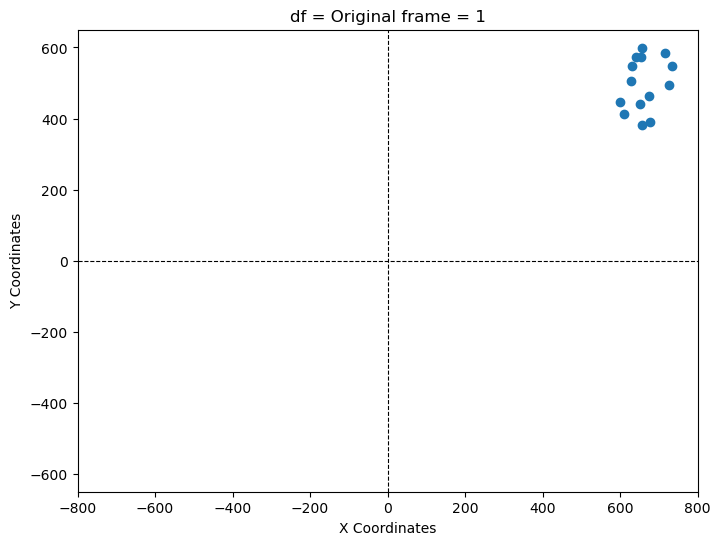

In [5]:
frame = 1
x_coord = df.iloc[frame, 1:-2:3]
y_coord = df.iloc[frame, 2:-2:3]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-800, 800)
plt.ylim(-650, 650)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

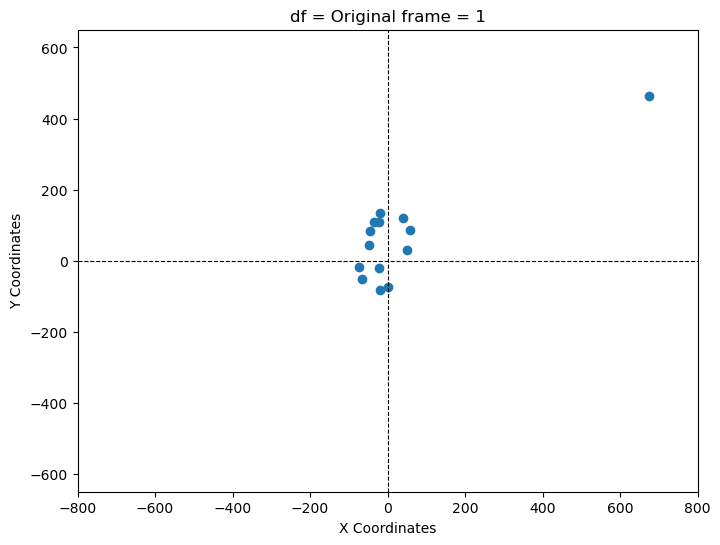

In [6]:
frame = 1
x_coord = mc_df.iloc[frame, 1:-2:3]
y_coord = mc_df.iloc[frame, 2:-2:3]

plt.figure(figsize=(8,6))

plt.scatter(x_coord, y_coord)
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.title(f'df = Original frame = {frame}')
plt.xlim(-800, 800)
plt.ylim(-650, 650)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
plt.show()

In [17]:
for file in os.listdir(main_folder+'/Datasets/Original'):
    mouse=file.split("_")[0]
    file=os.path.join(main_folder+'/Datasets/Original/', file)
    df = pd.read_csv(file)
    
    cc_df = df.copy()
    cc_df = cc_df.iloc[:, 1:-1]
    
    for column_index in range(0, len(cc_df.columns), 3):
        x_column = cc_df.columns[column_index]
        y_column = cc_df.columns[column_index+1]
        
        cc_df[x_column] = cc_df[x_column] - cc_df[x_column].shift(1)
        cc_df[y_column] = cc_df[y_column] - cc_df[y_column].shift(1)
        
        cc_df[x_column] = cc_df[x_column].fillna(0)
        cc_df[y_column] = cc_df[y_column].fillna(0)
        
    cc_df.insert(0, 'frame_number', df['frame_number'])
    cc_df['mouse_no'] = float(mouse)
    path_cc = "C:/Users/Kieran/Documents/Master Thesis Data/Datasets/ChangeCoords"
    if not os.path.exists(path_cc):
        os.makedirs(path_cc)
    cc_df.to_csv(f'{path_cc}/{mouse}_ChangeCoords_data.csv', index=False)